---
title: "basic concepts"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---


Suppose we randomly select 30 seven-year-old boys from schools around the country and measure their heights (this is our sample). We’d like to use their average height to estimate the true average height of all seven-year-old boys nationwide (the population). Because different samples of 30 boys would yield slightly different averages, we need a way to quantify that uncertainty. A confidence interval gives us a range—based on our sample data—that expresses what we would expect to find if we were to repeat this sampling process many times.

In [56]:
#| code-summary: "import libraries"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
from scipy.stats import norm, ttest_ind, t
import scipy
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
# %matplotlib widget

In [57]:
#| code-summary: "load data"
df_boys = pd.read_csv('../archive/data/height/boys_height_stats.csv', index_col=0)
age = 7.0
mu_boys = df_boys.loc[age, 'mu']
sigma_boys = df_boys.loc[age, 'sigma']

See the height distribution for seven-year-old boys. Below it we see the means for 20 samples of groups of 30 boys. The 95% confidence interval is the range of values that, on average, 95% of the samples CI contain the true population mean. In this case, this amounts to one out of the 20 samples.

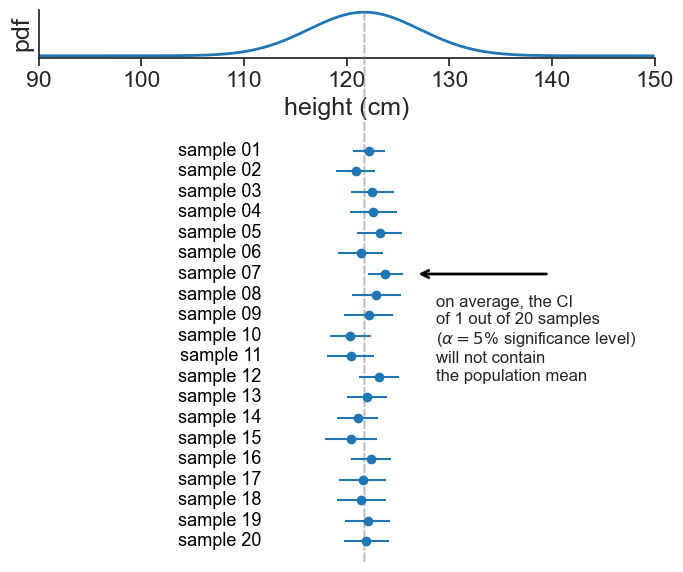

In [69]:
#| code-summary: "plot samples against population pdf"
np.random.seed(628)
height_list = np.arange(90, 150, 0.1)
pdf_boys = norm.pdf(height_list, loc=mu_boys, scale=sigma_boys)

fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[0.1, 0.9])
gs.update(left=0.09, right=0.86,top=0.98, bottom=0.06, hspace=0.30, wspace=0.05)
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0])

ax0.plot(height_list, pdf_boys, lw=2, color='tab:blue', label='population')

N_samples = 20
N = 30

for i in range(N_samples):
    sample = norm.rvs(loc=mu_boys, scale=sigma_boys, size=N)
    sample_mean = sample.mean()
    # confidence interval
    alpha = 0.05
    z_crit = scipy.stats.t.isf(alpha/2, N-1)
    CI = z_crit * sample.std(ddof=1) / np.sqrt(N)
    ax1.errorbar(sample_mean, i, xerr=CI, fmt='o', color='tab:blue', 
                 label=f'sample {i+1}' if i == 0 else "", capsize=0)


from matplotlib.patches import ConnectionPatch
line = ConnectionPatch(xyA=(mu_boys, pdf_boys.max()), xyB=(mu_boys, -1), coordsA="data", coordsB="data",
                      axesA=ax0, axesB=ax1, color="gray", linestyle='--', linewidth=1.5, alpha=0.5)
ax1.add_artist(line)

ax1.annotate(
        '',
        xy=(mu_boys + 5, 13),  # tip of the arrow (first error bar, y=0)
        xytext=(mu_boys + 5 + 13, 13),  # text location
        arrowprops=dict(arrowstyle='->', lw=2, color='black'),
        fontsize=13,
        color='tab:blue',
        ha='left',
        va='center'
)

ax1.text(mu_boys + 5 + 2, 12, "on average, the CI\nof 1 out of 20 samples\n"
         r"($\alpha=5$% significance level)"
          "\nwill not contain\nthe population mean",
          va="top", fontsize=12)

# write "sample i" for each error bar
for i in range(N_samples):
    ax1.text(mu_boys -10, i, f'sample {N_samples-i:02d}', 
             fontsize=13, color='black',
             ha='right', va='center')

# ax.legend(frameon=False)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax0.set(xticks=np.arange(90, 151, 10),
        xlim=(90, 150),
        xlabel='height (cm)',
        # xticklabels=[],
        yticks=[],
        ylabel='pdf',
        )
ax1.set(xticks=[],
        xlim=(90, 150),
        ylim=(-1, N_samples),
        yticks=[],
       );